In [180]:
# Packages necessary for this notebook
import numpy             as np
import pandas            as pd
import xarray            as xr
import seaborn           as sns
import cartopy.crs       as crs
import cartopy.feature   as cfeature
import matplotlib
import matplotlib.pyplot as plt

In [181]:
# Import the NOAA data from 1981-2019
NOAA = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\NOAA\sst.day.mean.PacCst.1981-2019.nc')

In [182]:
# Put in your temperature ranges here:
# All temperatures in Celcius
min_Temp = 20
max_Temp = 24

In [183]:
# Get lat and lon data
lat = NOAA.lat.data
lon = NOAA.lon.data


In [184]:
#NOAA_years = np.where((pd.DatetimeIndex(NOAA.time.data).year>=1982) & (pd.DatetimeIndex(NOAA.time.data).year<=2018))
#NOAA_years = np.where((pd.DatetimeIndex(NOAA.time.data).year==curYear))
#NOAA_short = NOAA.sst[(NOAA_years[0]),:,:]

In [185]:
# Create a mask for land, count the days, and average them over years
#NOAA_Mask  = NOAA.sst.where(NOAA.sst.isnull(), 1)
#NOAA_Count = NOAA_short.where((NOAA_short <= max_Temp) & (NOAA_short >= min_Temp)).groupby('time.day').count(dim='time')
#count_Mean = NOAA_Count.mean(dim="day")
#NOAA_Final = count_Mean*NOAA_Mask[0,:,:]

In [186]:
# Standard deviation data. We might change this, but for now this works
#std_Dev = NOAA_Count.std(dim="day")*NOAA_Mask[0,:,:]

In [187]:
# Just for getting state lines 
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


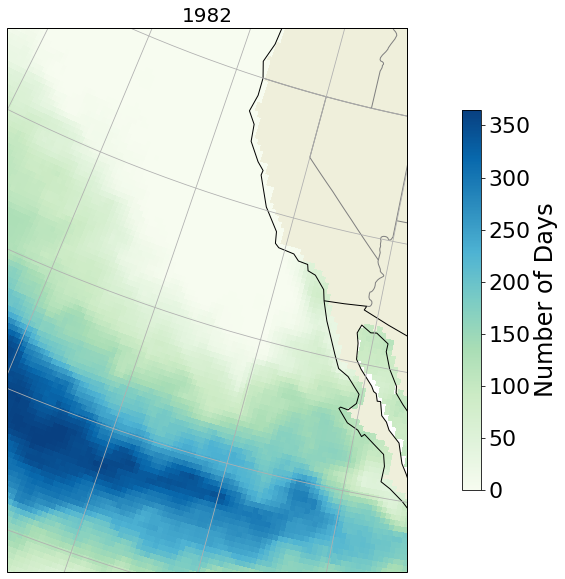

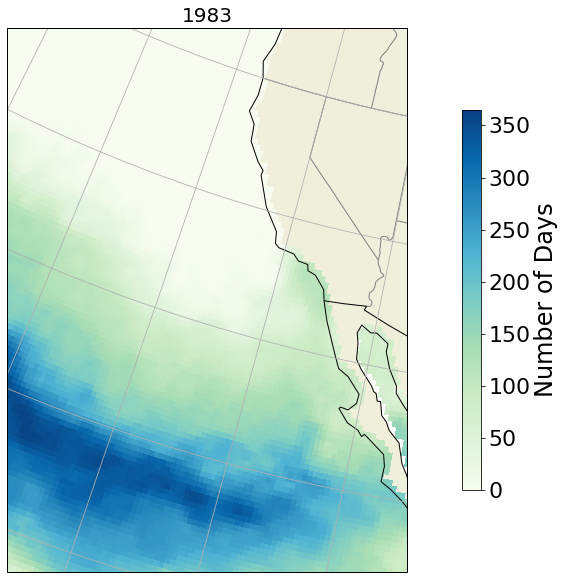

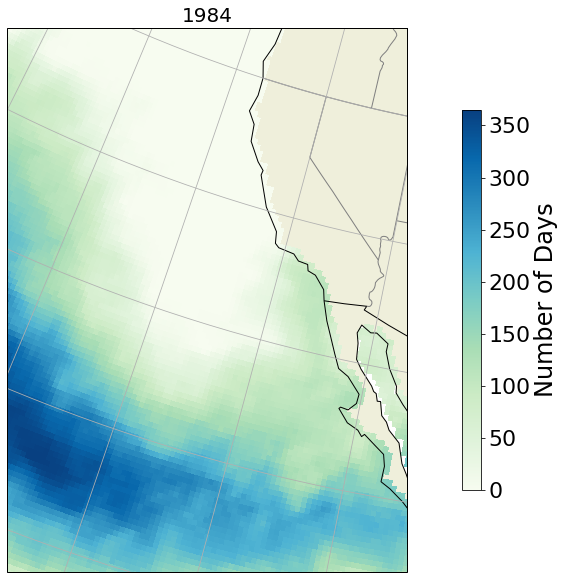

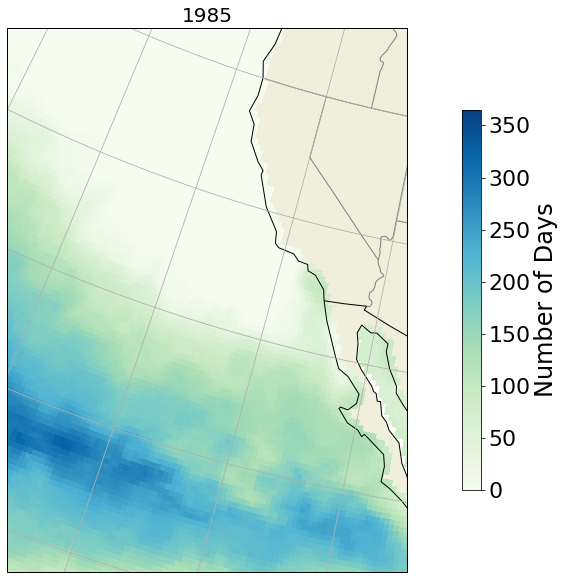

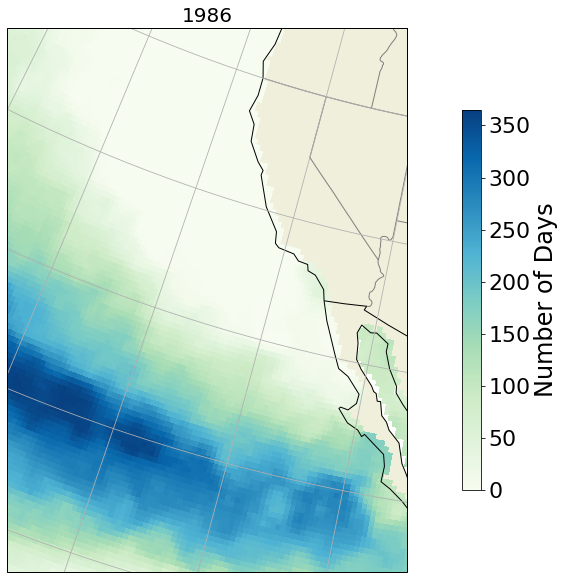

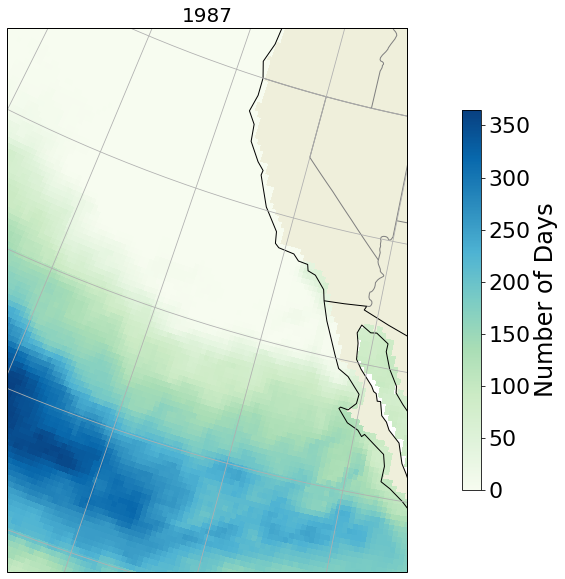

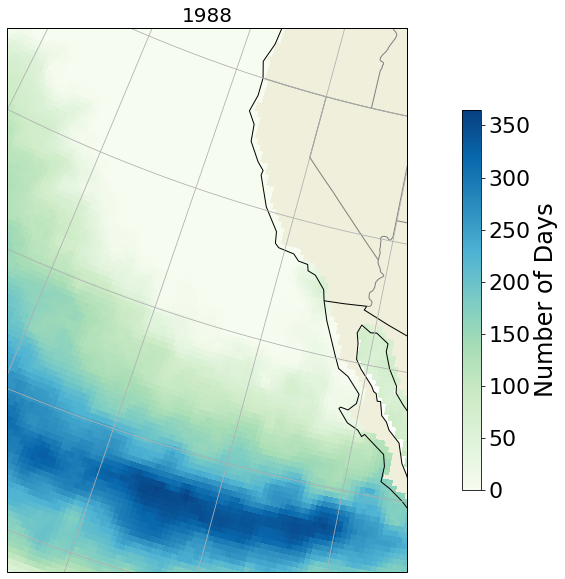

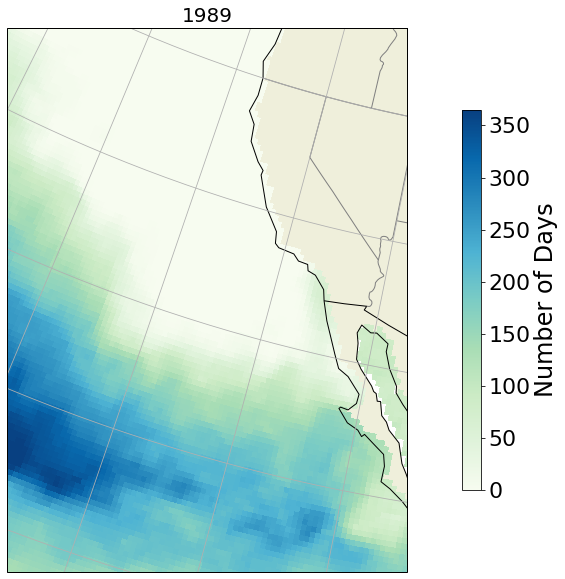

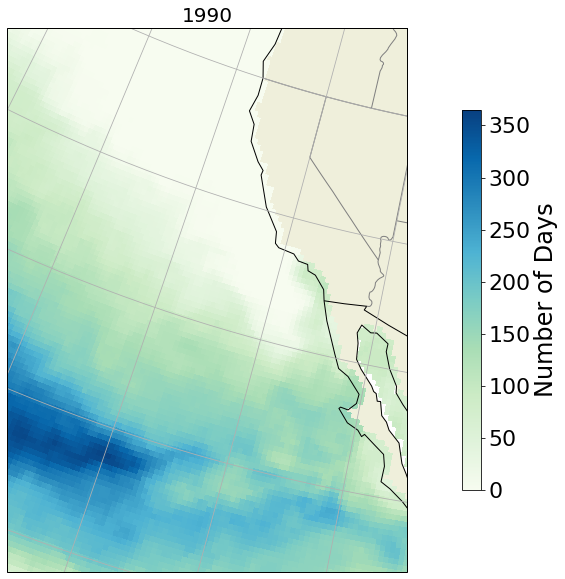

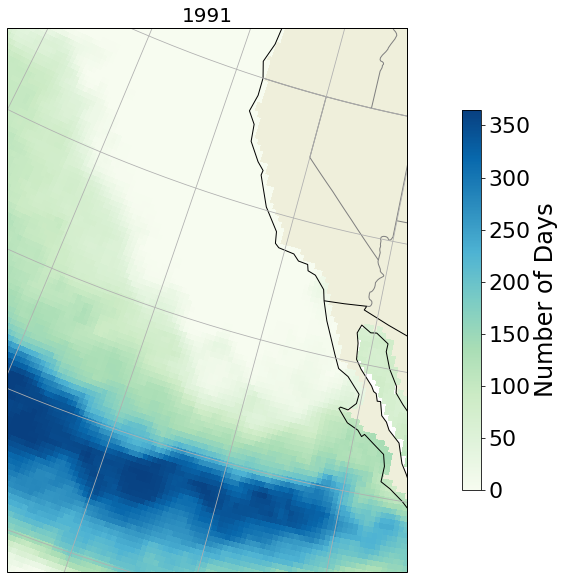

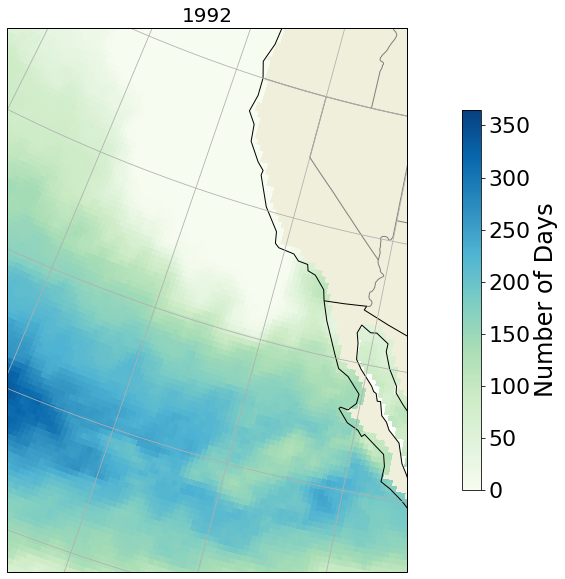

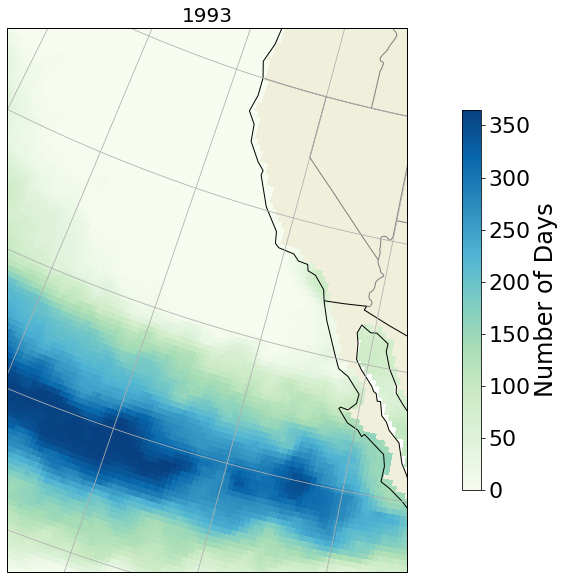

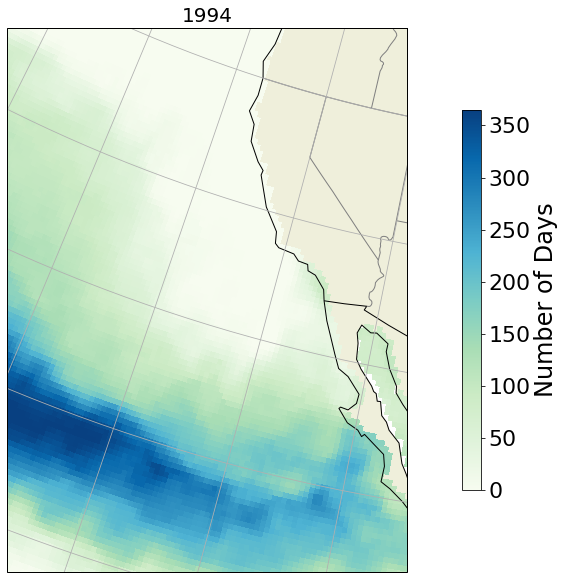

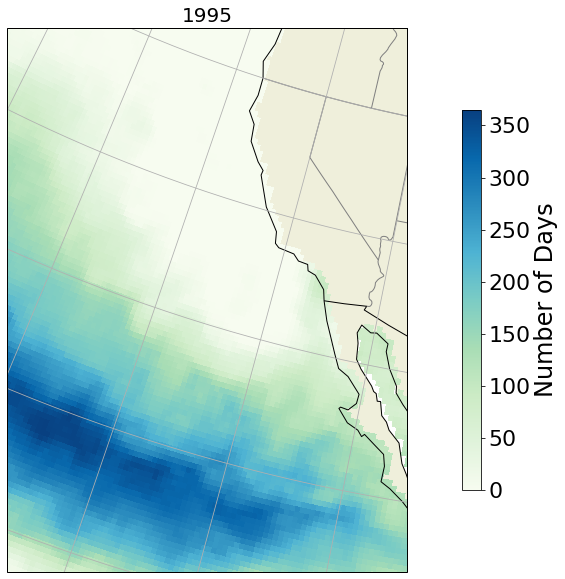

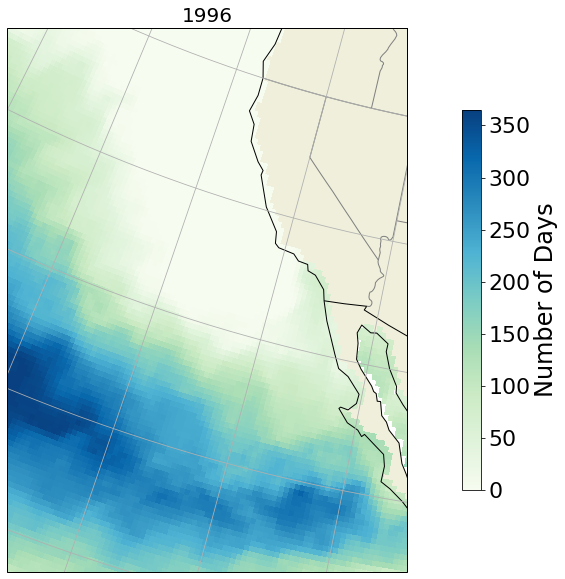

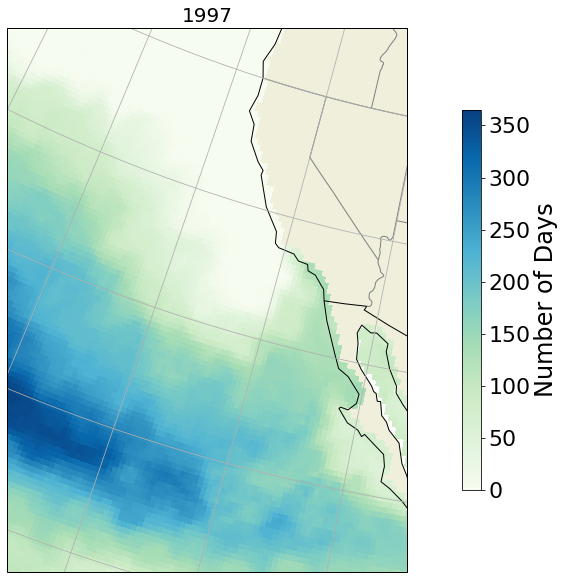

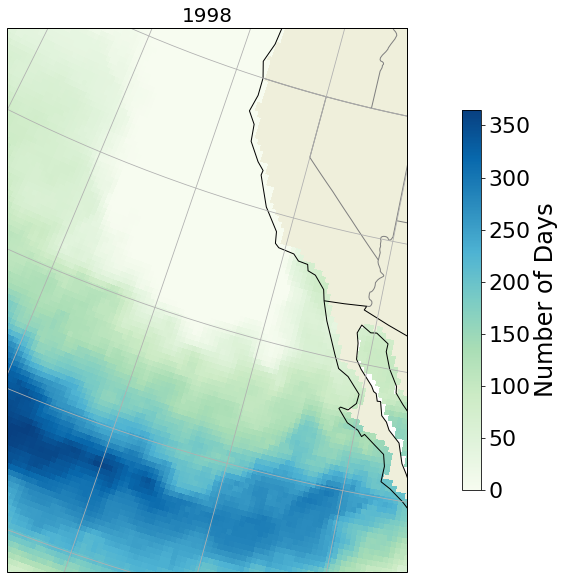

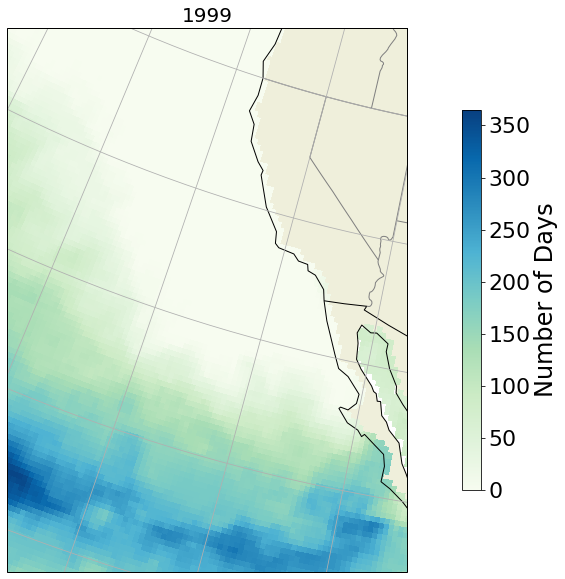

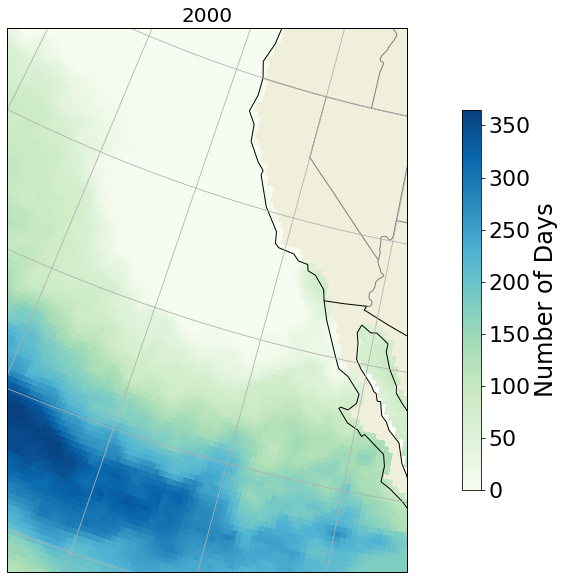

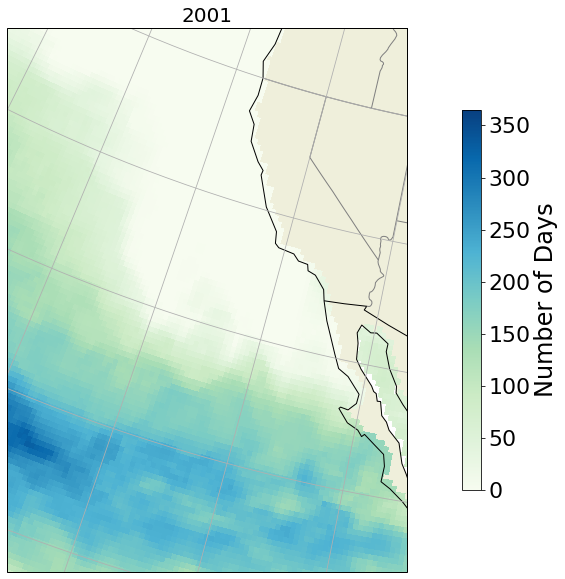

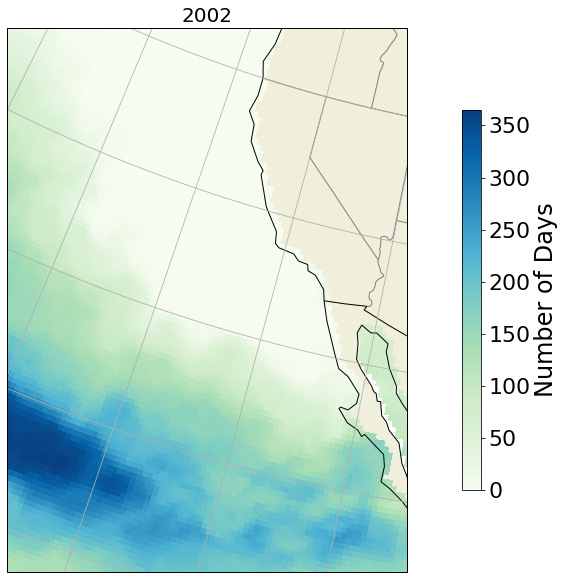

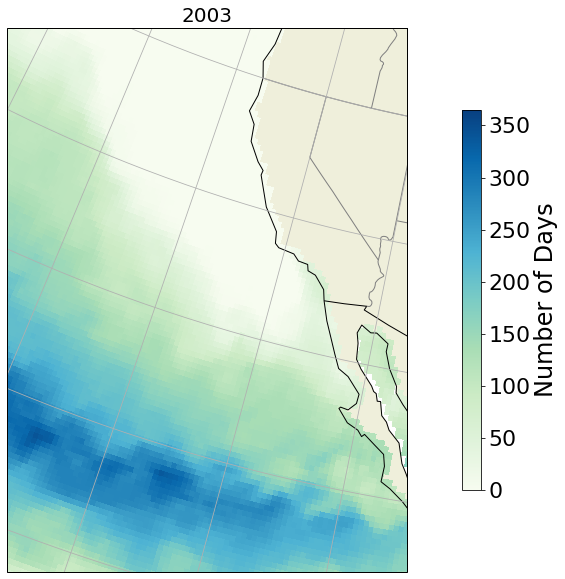

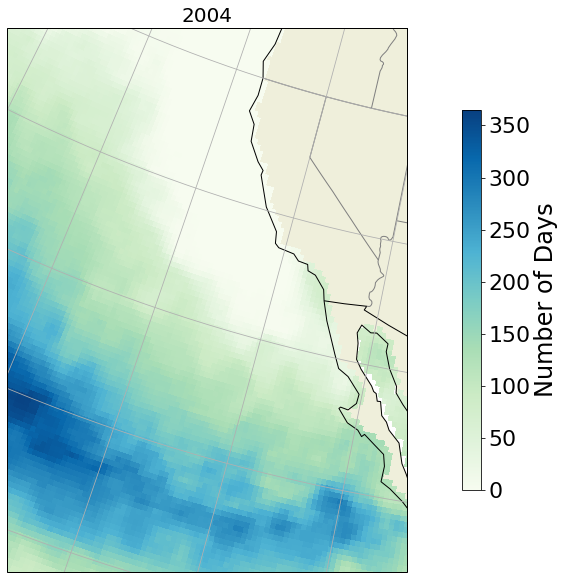

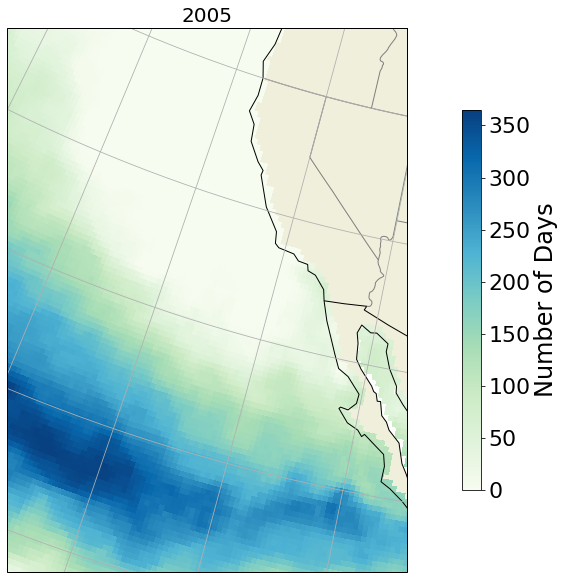

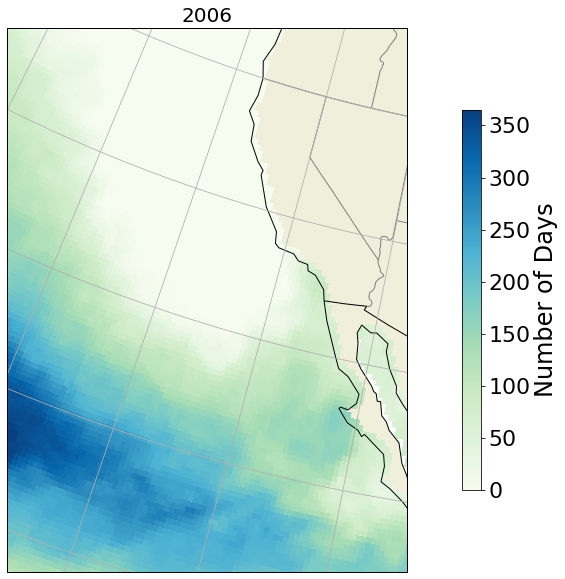

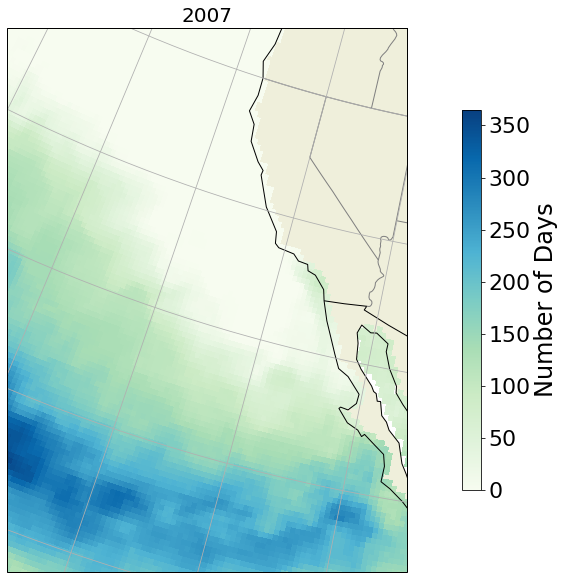

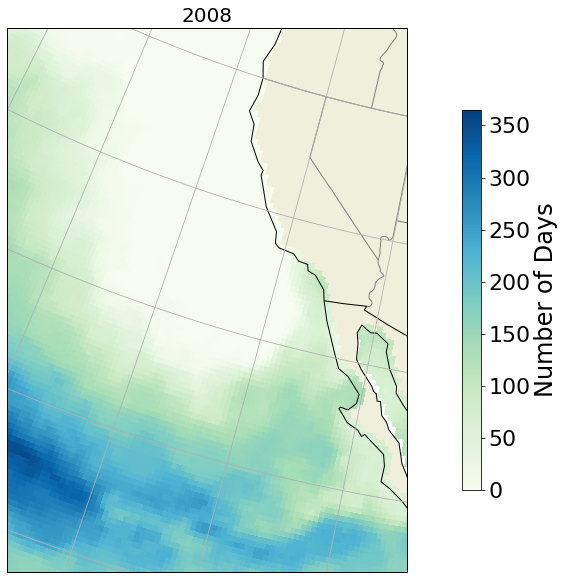

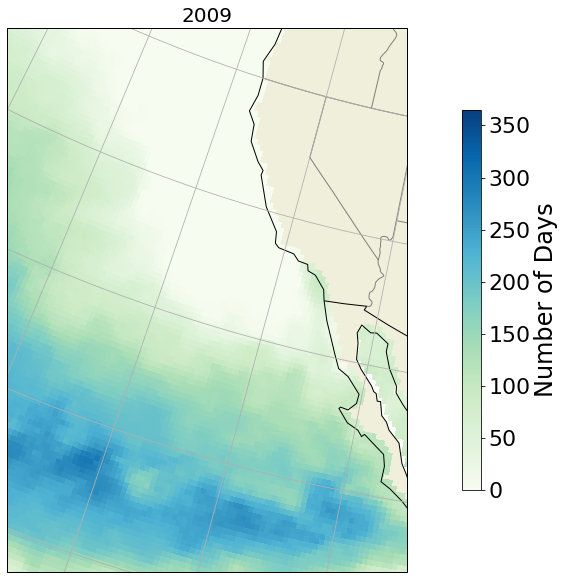

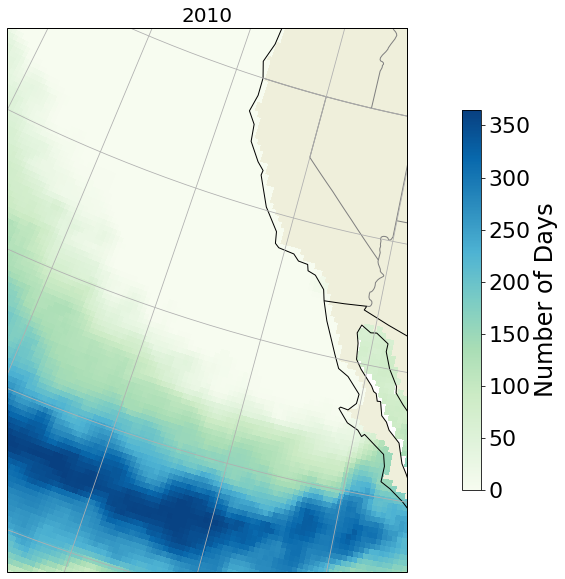

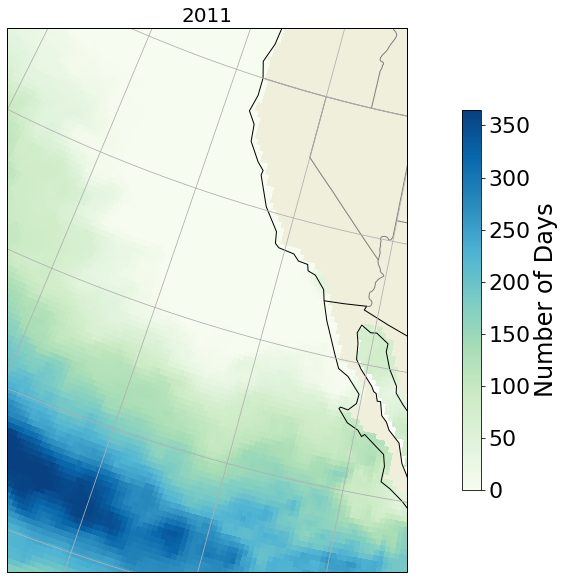

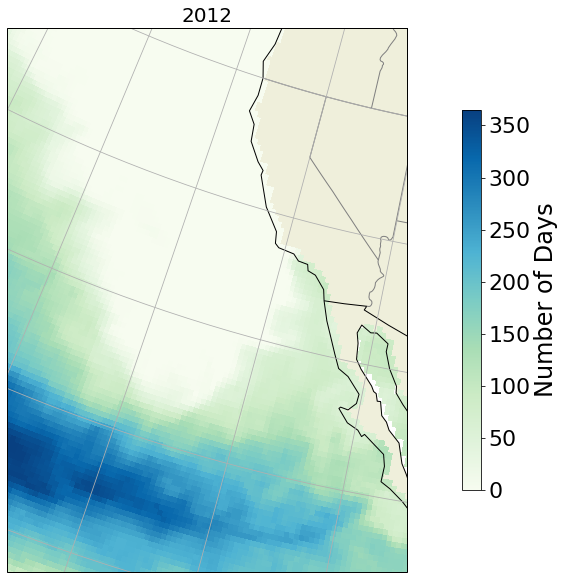

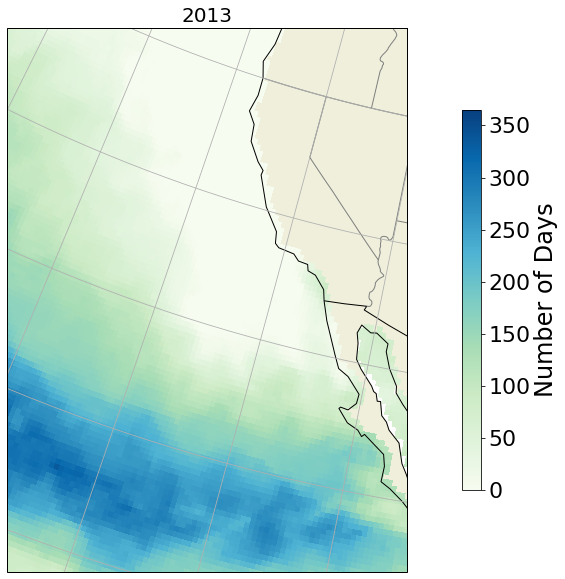

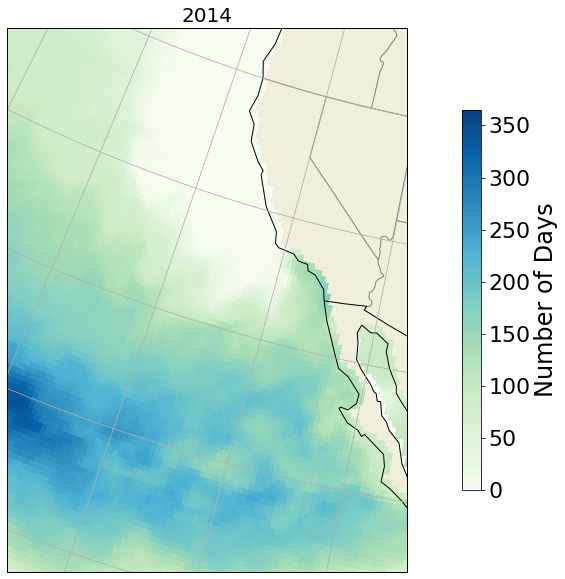

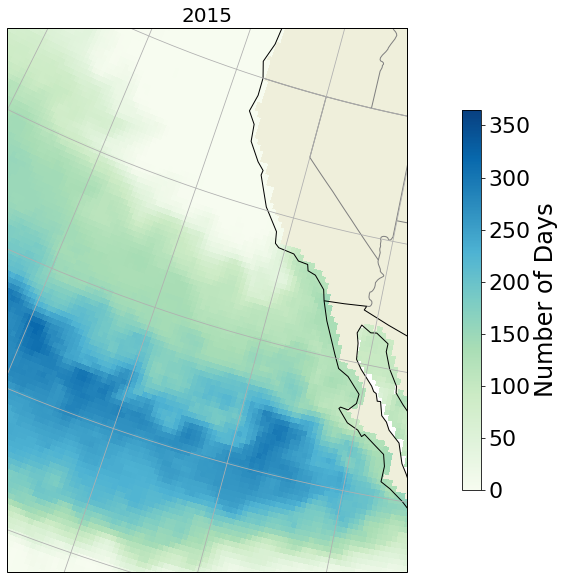

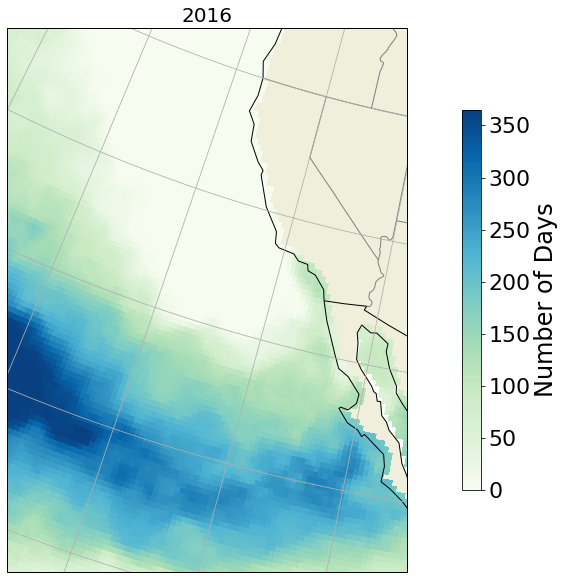

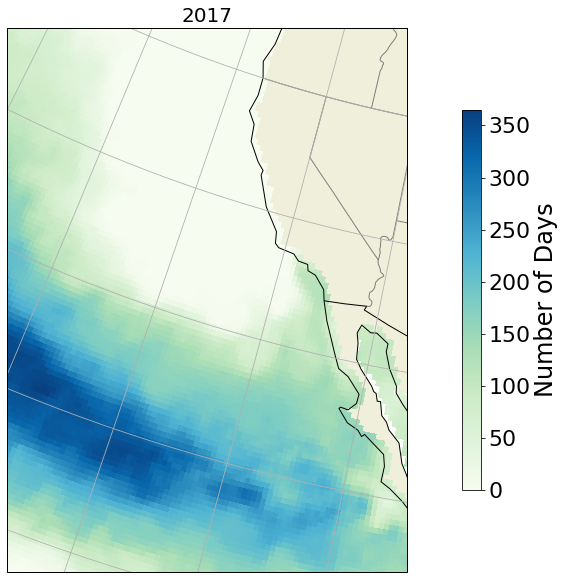

In [188]:
for curYear in range(1982, 2018):
    NOAA_years = np.where((pd.DatetimeIndex(NOAA.time.data).year==curYear))
    NOAA_short = NOAA.sst[(NOAA_years[0]),:,:]
    
    NOAA_Mask  = NOAA.sst.where(NOAA.sst.isnull(), 1)
    NOAA_Count = NOAA_short.where((NOAA_short <= max_Temp) & (NOAA_short >= min_Temp)).groupby('time.year').count(dim='time')
    count_Mean = NOAA_Count.mean(dim="year")
    NOAA_Final = count_Mean*NOAA_Mask[0,:,:]
    
    # Creating a figure, change name to species name
    fig = plt.figure(figsize=[20,10])
    #fig.suptitle('HAB Temperature Range',fontsize=32)

    # Plot the count_Mean data
    NOAA_Plot = fig.add_subplot(1,1,1,projection=crs.LambertConformal())
    NOAA_Plot.set_title(str(curYear), fontsize=20)
    NOAA_Plot.set_extent([230,245,20,43], crs.Geodetic())
    NOAA_Colormesh = NOAA_Plot.pcolormesh(lon, lat, NOAA_Final.data,
                 transform=crs.PlateCarree(),
                 cmap='GnBu',vmax=365)
    NOAA_Plot.add_feature(cfeature.COASTLINE)
    NOAA_Plot.add_feature(cfeature.LAND)
    NOAA_Plot.add_feature(cfeature.BORDERS)
    NOAA_Plot.add_feature(states_provinces, edgecolor='gray')
    NOAA_Plot.gridlines()

    # Create a colorbar
    colorbar = fig.colorbar(NOAA_Colormesh, shrink=0.7, anchor=('SW'))
    colorbar.set_label('Number of Days',fontsize=24)
    colorbar.ax.tick_params(labelsize=22)

    ''' Plot the std_Dev data
    std_Plot = fig.add_subplot(1,2,2,projection=crs.LambertConformal())
    std_Plot.set_title('Standard Deviation', fontsize=20)
    std_Plot.set_extent([230,245,20,43], crs.Geodetic())
    std_Colormesh = std_Plot.pcolormesh(lon, lat, std_Dev.data,
                 transform=crs.PlateCarree(),
                 cmap='jet')
    std_Plot.add_feature(cfeature.COASTLINE)
    std_Plot.add_feature(cfeature.LAND)
    std_Plot.add_feature(cfeature.BORDERS)
    std_Plot.add_feature(states_provinces, edgecolor='gray')
    std_Plot.gridlines()

    # A new colorbar
    colorbar2 = fig.colorbar(std_Colormesh, shrink=0.7, anchor=('SW'))
    colorbar2.set_label('Number of Days',fontsize=24)
    colorbar2.ax.tick_params(labelsize=22)
    '''
    # Replace "add_name_here" with the name of your species, this will save the graph to the computer so we can have it
    # for Gaby's PowerPoint
    fig.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\HAB gif\ " + str(curYear)+ ".tif", bbox_inches='tight')

In [189]:
NOAA_Count.sst

AttributeError: 'DataArray' object has no attribute 'sst'

In [ ]:
pd.DataFrame(NOAA.sst)